In [15]:
%matplotlib inline
from keras.models import Sequential
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.utils import plot_model
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Reshape, Flatten, Input, Lambda, Maximum, Softmax

initializer = tf.keras.initializers.Identity()
model =  Sequential() 
SEED = 1

In [16]:
class Min_Plus_Square(layers.Layer):
    def call(self, x):
        return keras.backend.min(x) + x * x


class Max(layers.Layer):
    def call(self, x):
        return keras.backend.max(x, axis=-1, keepdims=True)


class Sin(layers.Layer):
    def call(self, x):
        return keras.backend.sin(x)


model.add(Dense(units=20, input_dim=10, kernel_initializer=initializer))
model.add(Dropout(rate=0.3, seed = SEED))
model.add(Min_Plus_Square())
model.add(Activation('relu'))
model.add(Reshape((4,5)))
model.add(Dense(units=10, kernel_initializer=initializer))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Sin())
model.add(Dense(units=3, input_dim=40, kernel_initializer=initializer))
model.add(Softmax())
model.add(Max())

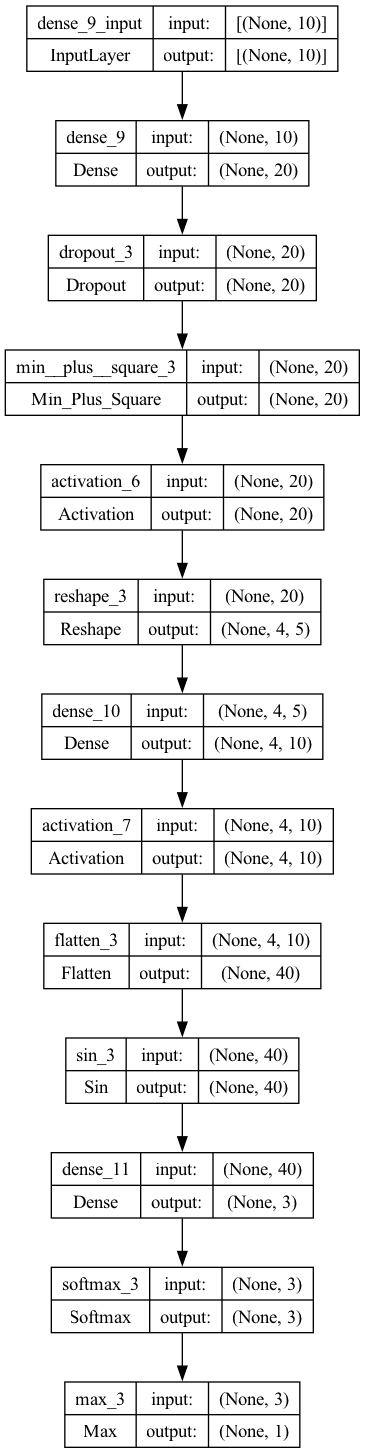

In [17]:
from keras.utils import plot_model
plot_model(model, to_file='model1.png',show_shapes=True,show_layer_names=True)

In [18]:
data = np.arange(10).reshape((1,-1))

In [19]:
model.compile(loss='mean_squared_error')
prediction = model.predict(data)
print(prediction)
print("prediction shape:", prediction.shape)

1/1 [==============================] - 0s 296ms/step
[[0.61224943]]
prediction shape: (1, 1)
